<a href="https://colab.research.google.com/github/moritakuya040/Wine-Variety-Prediction/blob/main/%E3%83%AF%E3%82%A4%E3%83%B3%E3%81%AE%E5%93%81%E7%A8%AE%E4%BA%88%E6%B8%AC%EF%BC%BF%E5%8F%AF%E8%A6%96%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 可視化

### 散布図

In [1]:
# ライブラリをインストール
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=e2aec2d67d4a2f8f51cf21b0124f9182adf302ff5965f2afd01e5a10270feb36
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
# データの形を整えるもの
import pandas as pd
# 図を描くためのもの1
import matplotlib.pyplot as plt
# 図を描くためのもの２
import seaborn as sns
# jupyterで図を表示させる
# % matplotlib inline
# 図のスタイルを決める、今回は[ggplot]
plt.style.use('ggplot')
# 図に日本語を表示させる
import japanize_matplotlib
# 警告メッセージを表示させない
import warnings
# 警告メッセージを表示させない
warnings.filterwarnings('ignore')

# seabornのバージョンを確認
print(sns.__version__)

0.11.2


In [3]:
# tsv形式のファイルをgoogle driveから読み込む
DATA = '/content/drive/MyDrive/Wine_Variety_Prediction/train.tsv'
df = pd.read_table('/content/drive/MyDrive/Wine_Variety_Prediction/train.tsv')

In [4]:
# データを確認
df

,id,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
2,3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
3,6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
4,9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,169,2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
85,172,3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
86,173,1,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270
87,176,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750


In [ ]:
print(df.dtypes)

id                                int64
Y                                 int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object


(array([28.,  0.,  0.,  0.,  0., 37.,  0.,  0.,  0., 24.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

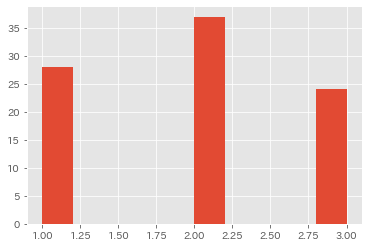

In [ ]:
# ワインの品種番号でヒストグラム化
plt.hist(df['Y'])

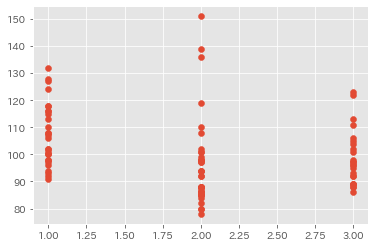

In [ ]:
#　簡単な散布図 、Magnesiumがint型のため
plt.scatter(df['Y'], df['Magnesium'])k
plt.show()

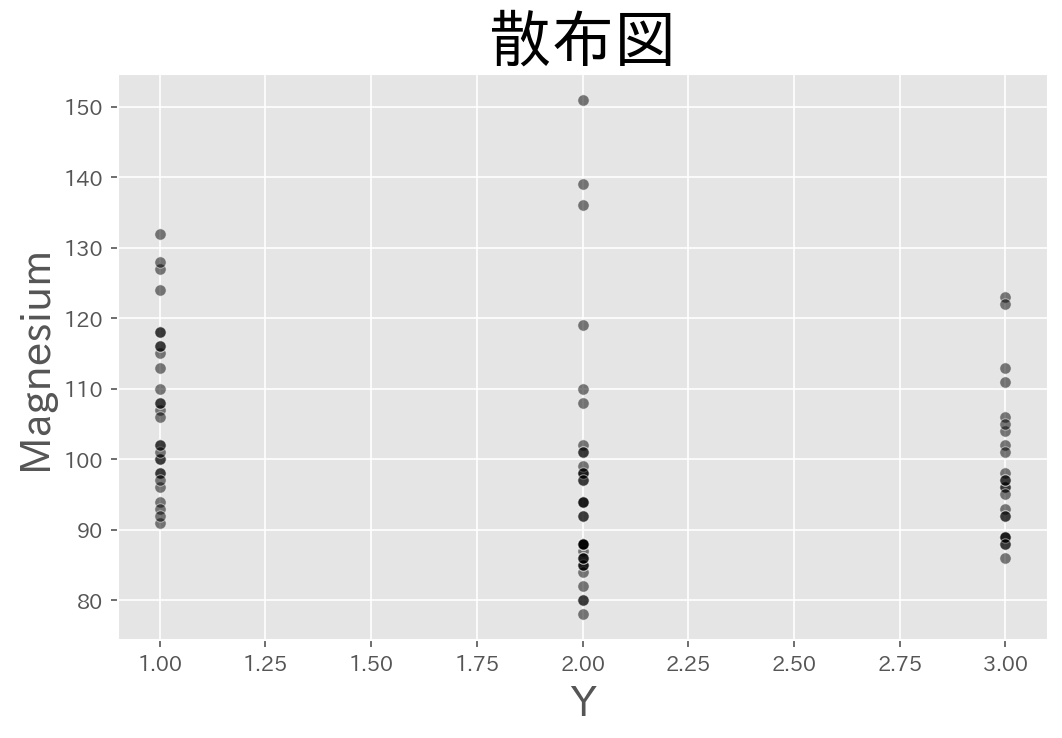

In [ ]:
# 散布図をカスタマイズする
plt.figure(figsize=(8,5),dpi=150)
plt.scatter(df['Y'], df['Magnesium'], s=30,alpha=0.5, c='black', edgecolors='w')
plt.title('散布図', fontsize=30)
plt.xlabel('Y', fontsize=20)
plt.ylabel('Magnesium', fontsize=20)

plt.show()

Text(393.80000000000007, 0.5, 'Magnesium')

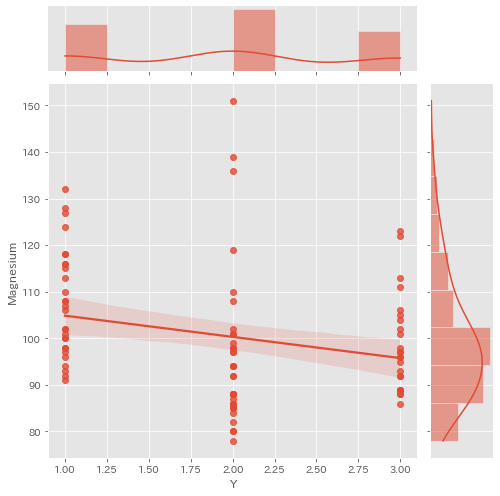

In [ ]:
# searbornで散布図を描く
sns.jointplot(x='Y', y='Magnesium', data=df, kind='reg', size=7)
plt.xlabel('Y', fontsize=20)
plt.ylabel('Magnesium', fontsize=20)

Text(0, 0.5, 'Magnesium')

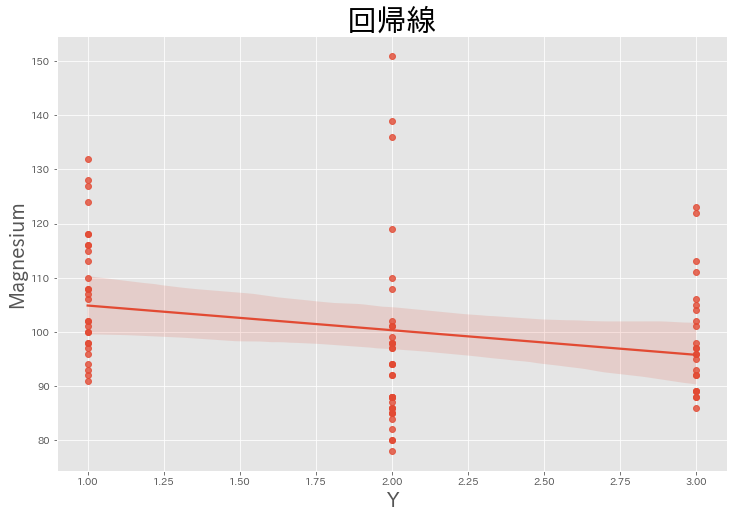

In [ ]:
# 散布図で回帰線を描く
plt.figure(figsize=(12,8))
sns.regplot(x='Y', y='Magnesium',data=df, ci=99)
plt.title('回帰線', fontsize=30)
plt.xlabel('Y', fontsize=20)
plt.ylabel('Magnesium', fontsize=20)

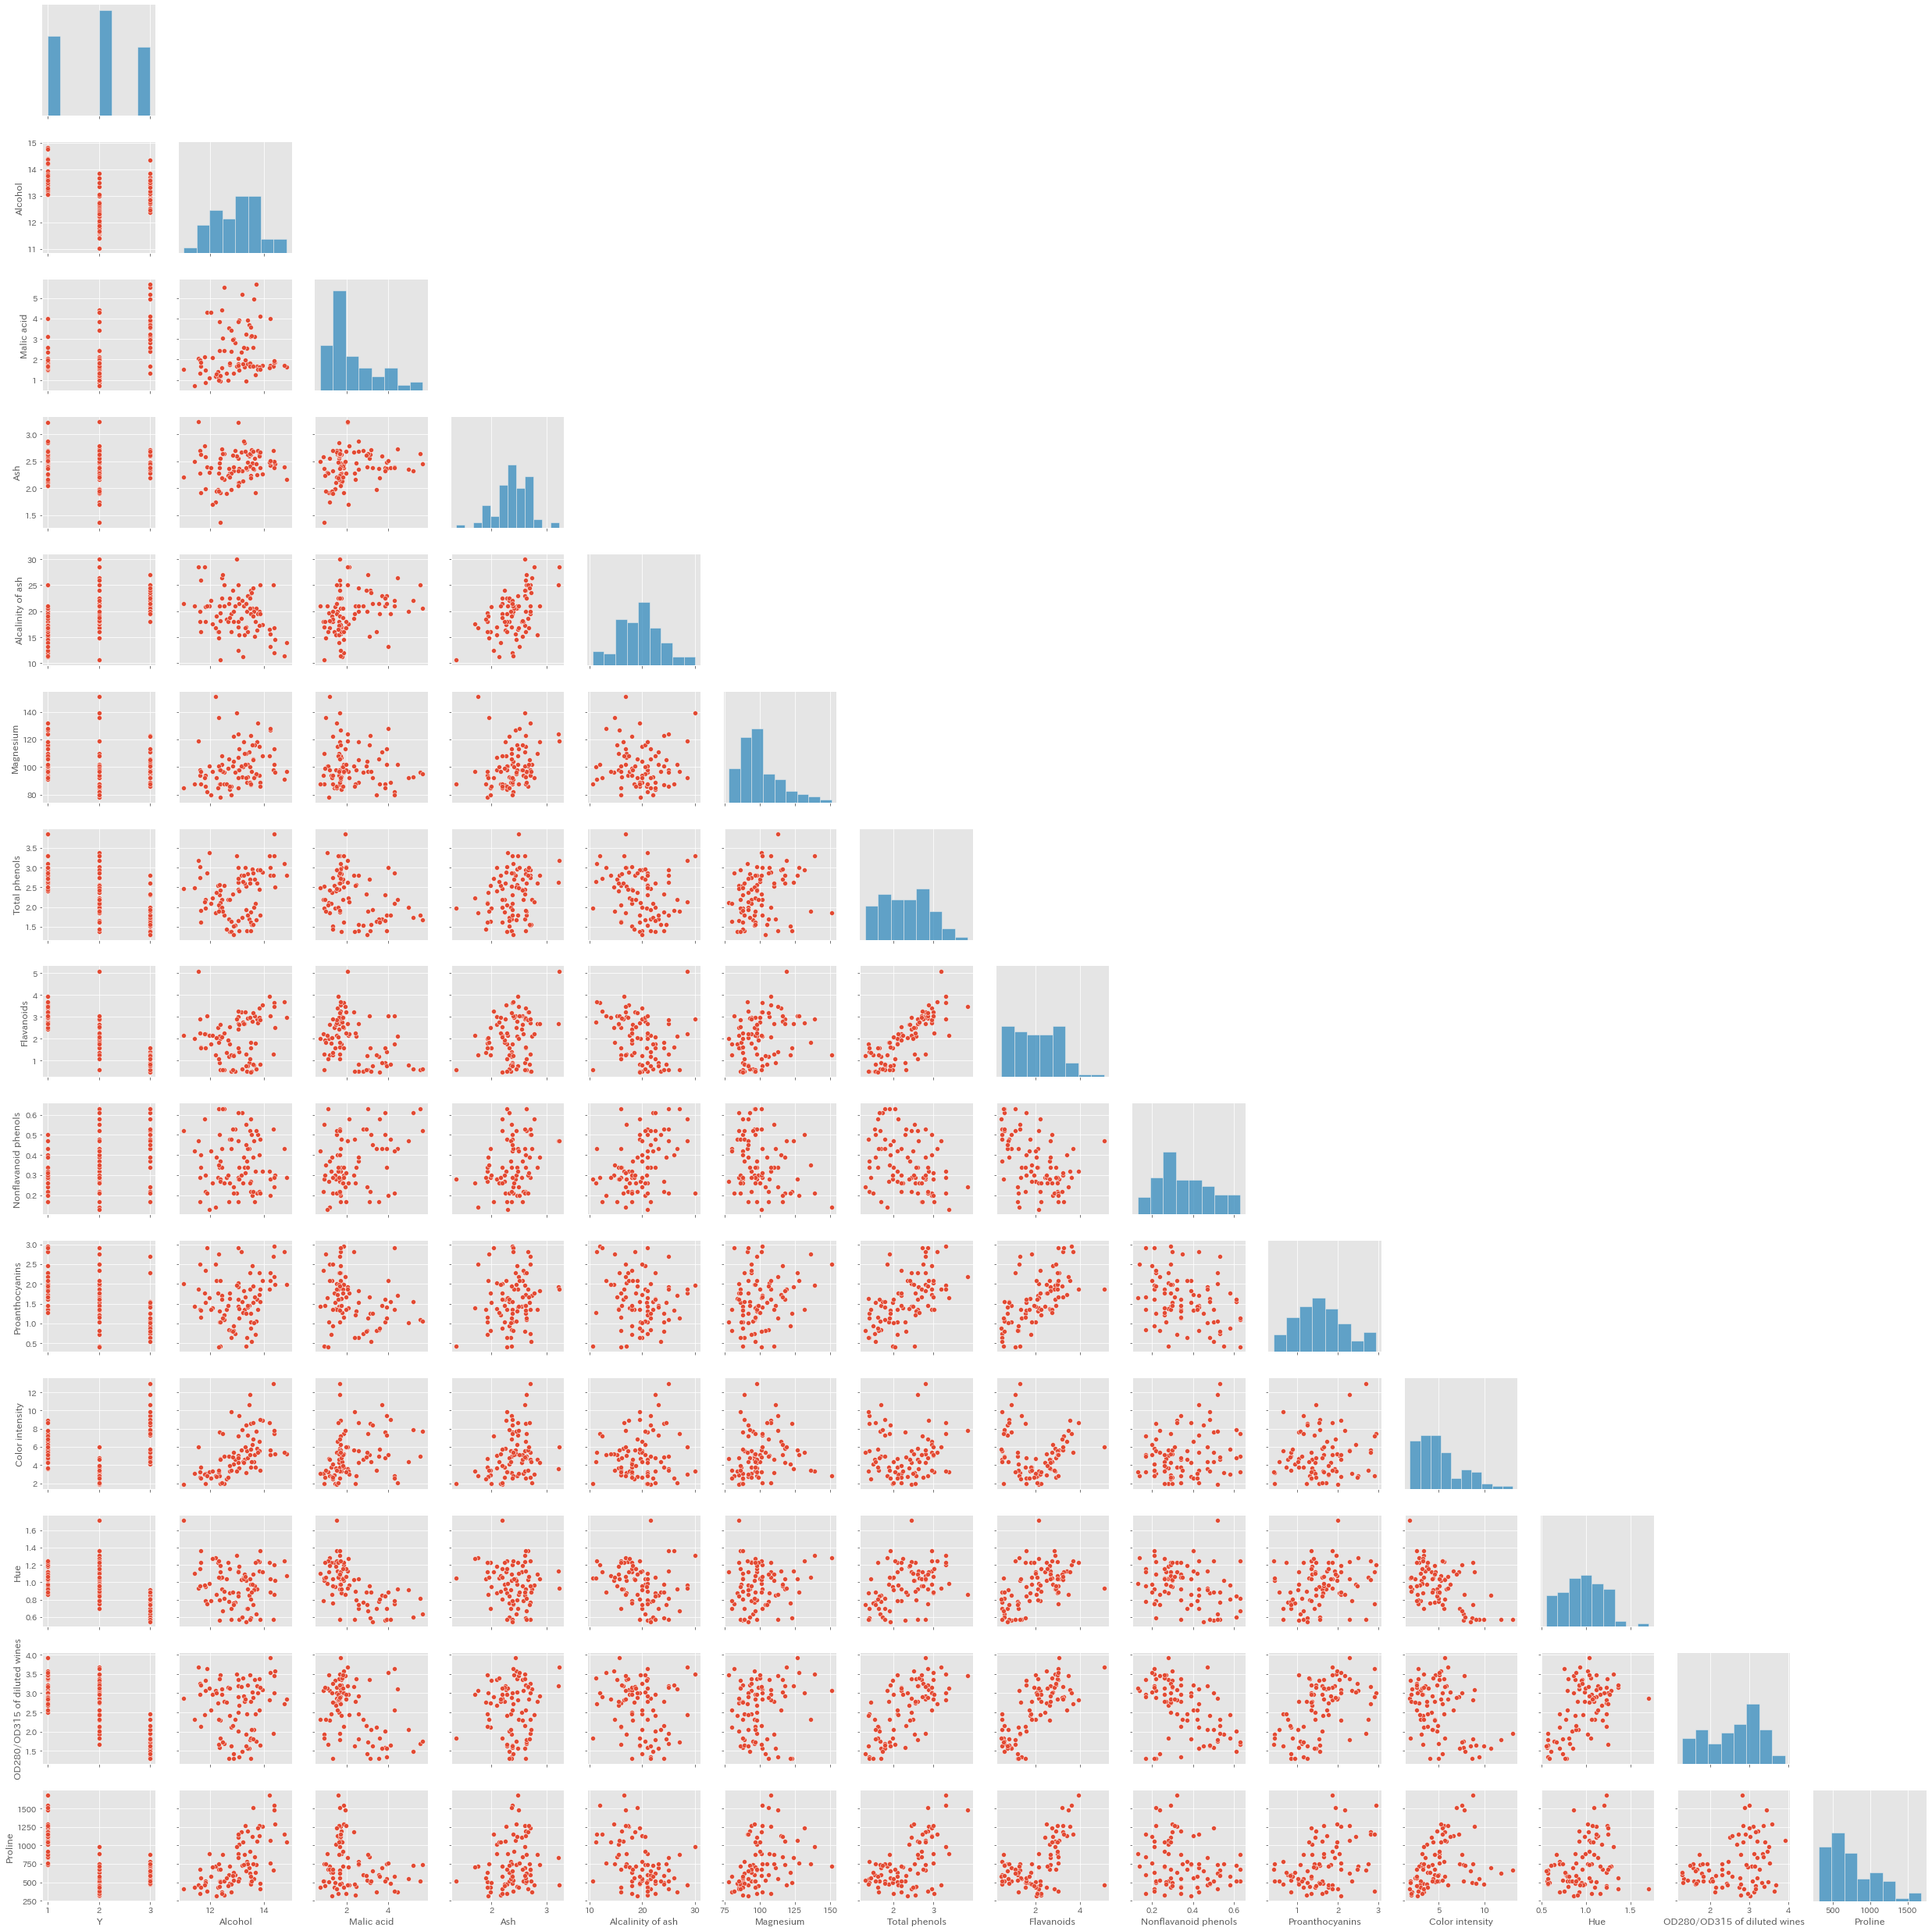

In [ ]:
# 散布図をたくさん描く
col = ['Y', 'Alcohol',	'Malic acid',	'Ash',	'Alcalinity of ash',	'Magnesium',	'Total phenols',	'Flavanoids',	'Nonflavanoid phenols',	'Proanthocyanins',	'Color intensity',	'Hue',	'OD280/OD315 of diluted wines',	'Proline']
sns.pairplot(data=df, vars=['Y', 'Alcohol',	'Malic acid',	'Ash',	'Alcalinity of ash',	'Magnesium',	'Total phenols',	'Flavanoids',	'Nonflavanoid phenols',	'Proanthocyanins',	'Color intensity',	'Hue',	'OD280/OD315 of diluted wines',	'Proline'], corner=True, size=2.5, hue = 'Y')

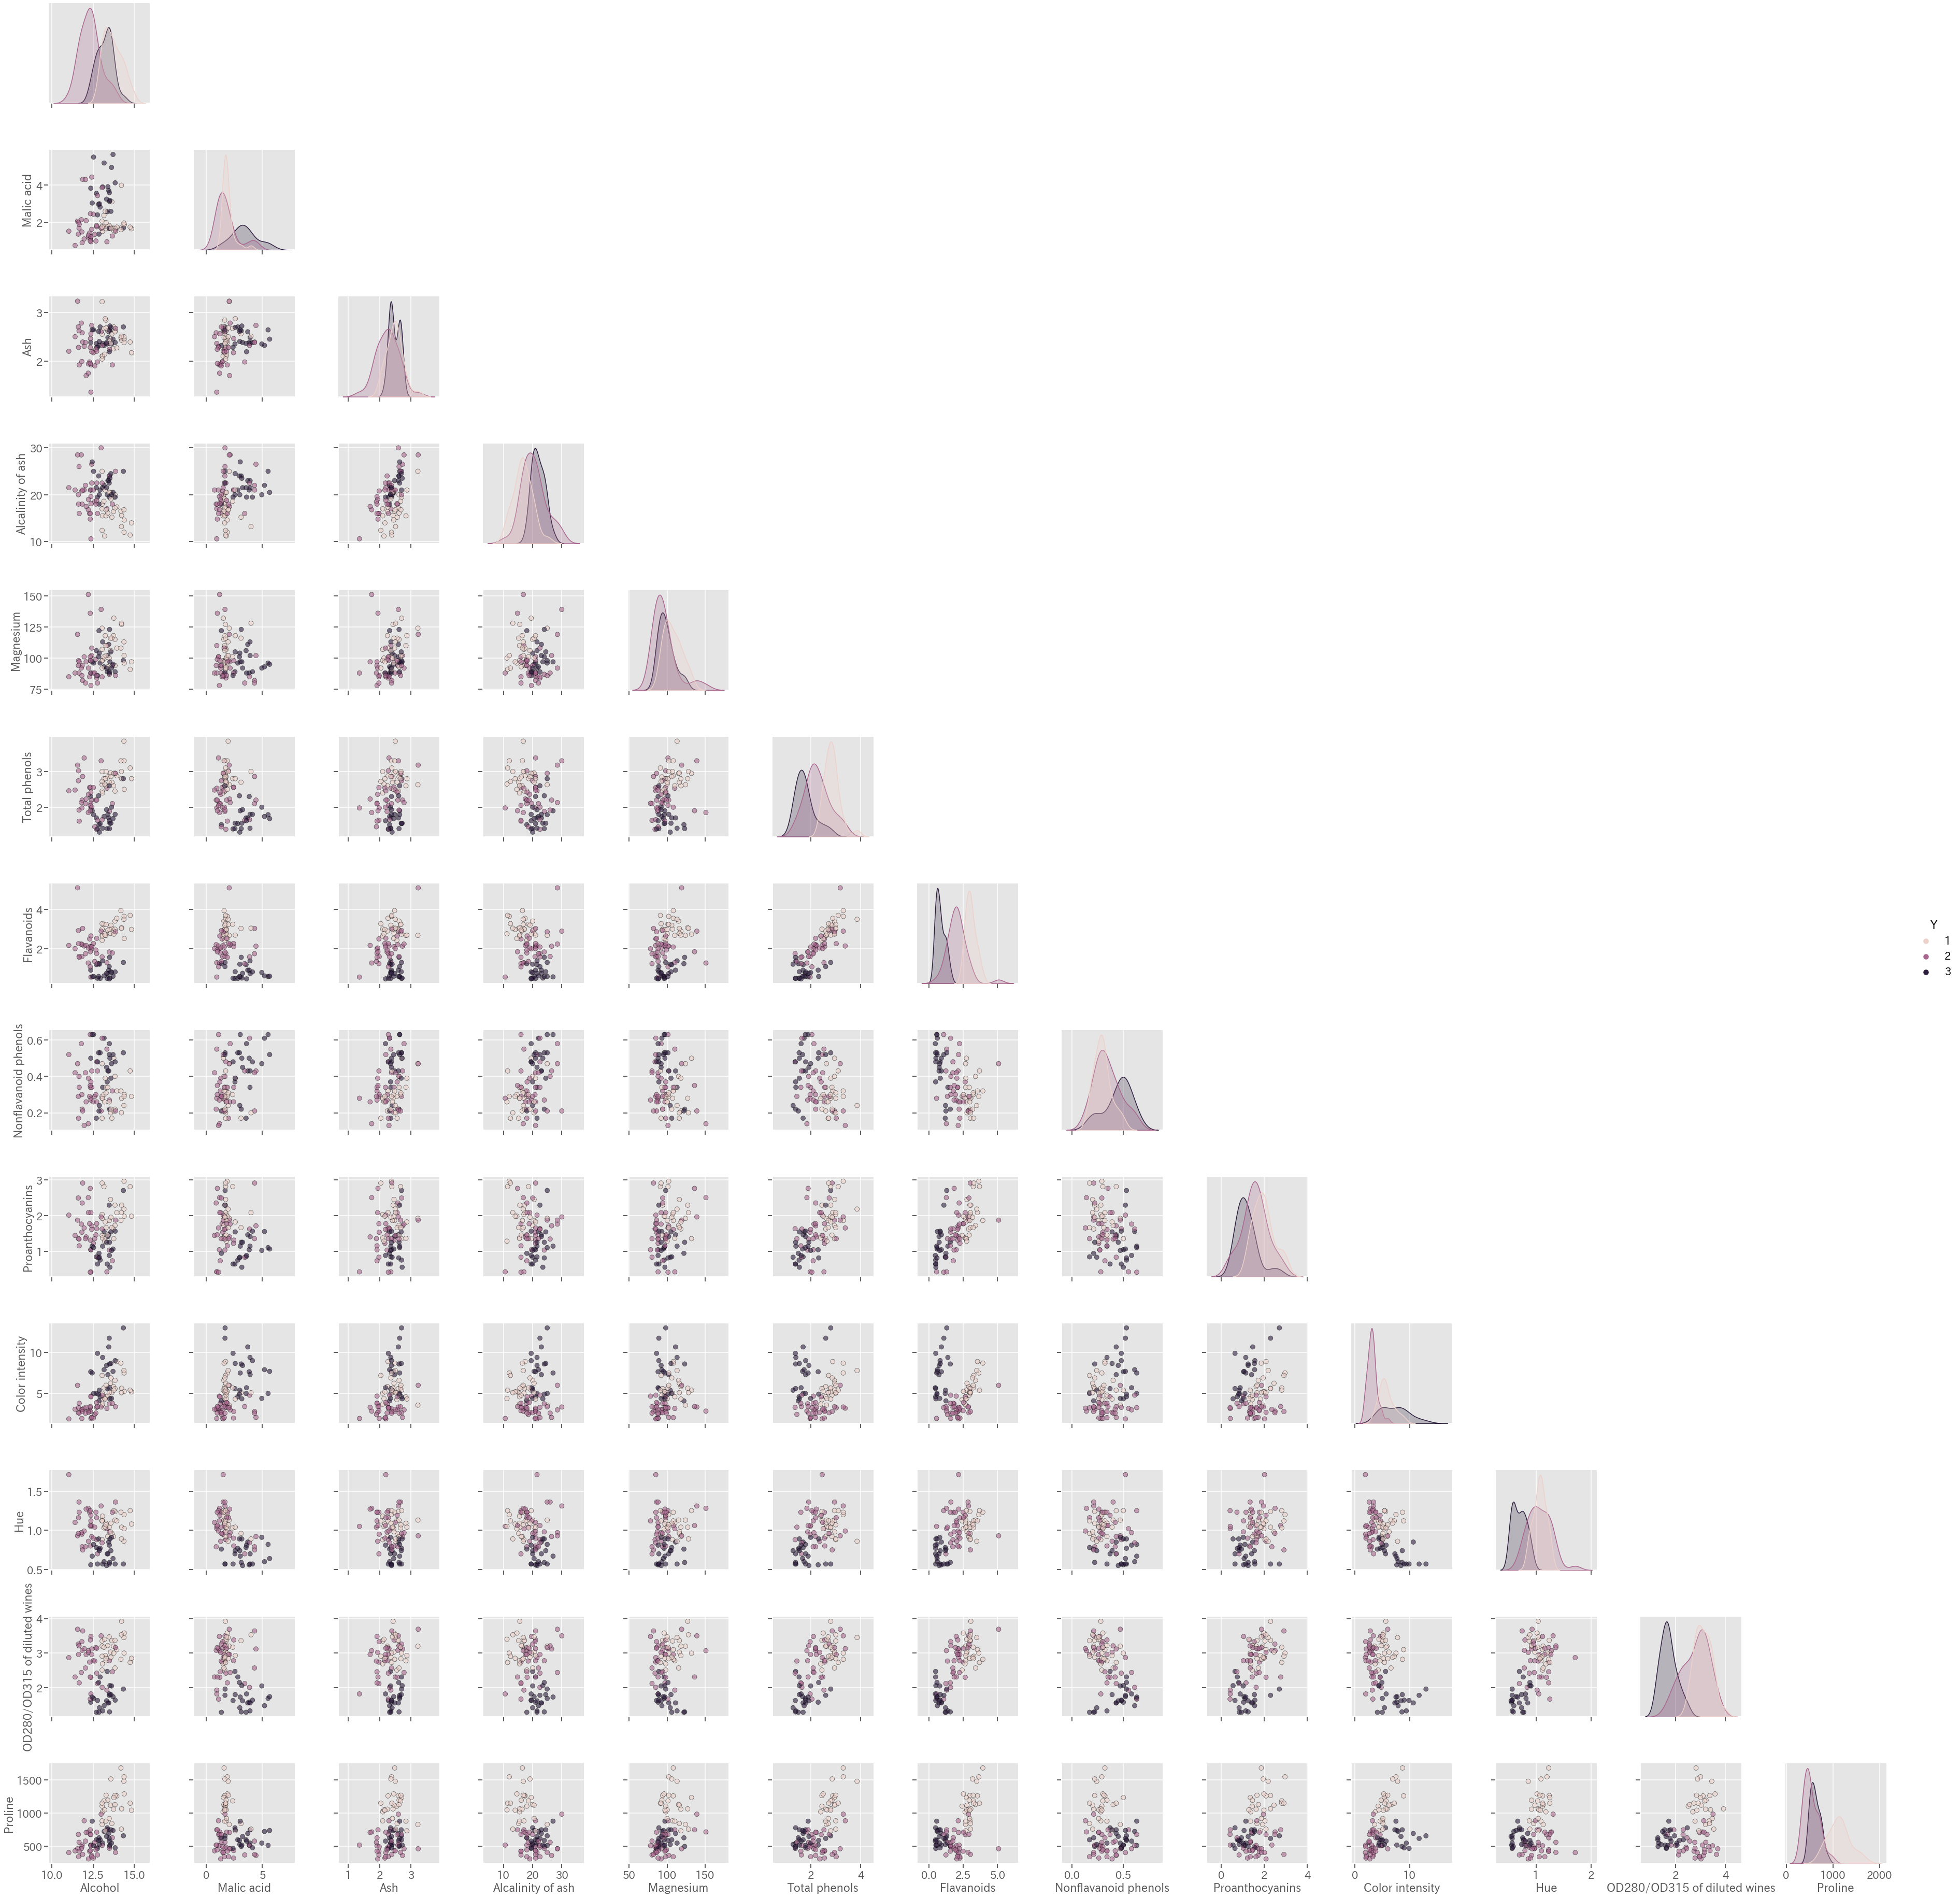

In [ ]:
import matplotlib
matplotlib.rcParams['font.size'] = 5
sns.set_context('talk', font_scale=1.2);

sns.pairplot(df[col], hue = 'Y', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4, corner=True);

### 相関図（ヒートマップ）

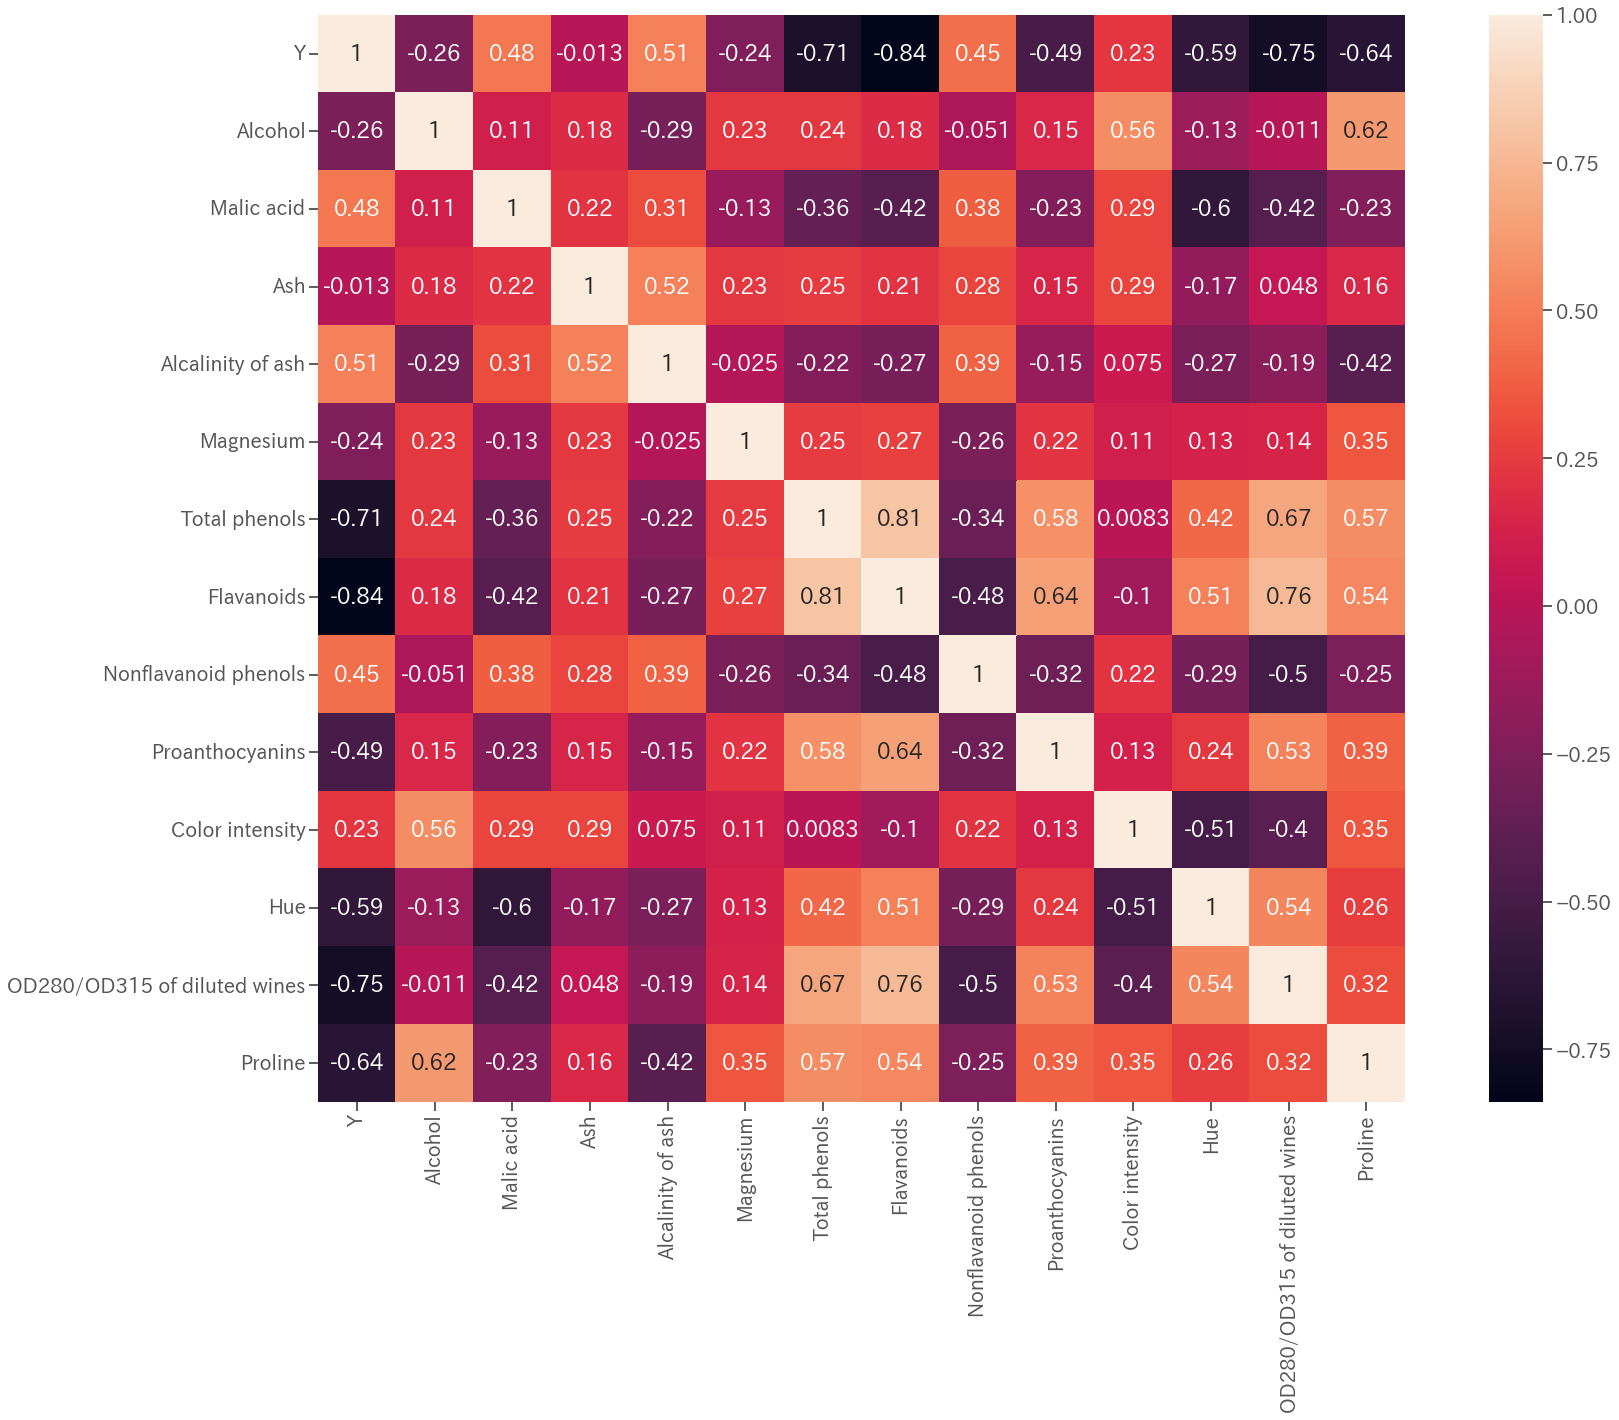

In [ ]:
import numpy as np

plt.figure(figsize=(30, 20))
cm = np.corrcoef(df[col].values.T)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,yticklabels=col,xticklabels=col)

### PCAした後の可視化

In [ ]:
# データ型の確認
type(df)

pandas.core.frame.DataFrame

In [ ]:
del df['id']
print(df)

    Y  Alcohol  Malic acid  ...   Hue  OD280/OD315 of diluted wines  Proline
0   3    12.36        3.83  ...  0.56                          1.58      520
1   2    12.42        4.43  ...  0.92                          3.12      365
2   1    13.05        1.77  ...  0.88                          3.35      885
3   1    13.05        1.65  ...  1.12                          2.51     1105
4   1    13.05        2.05  ...  1.13                          3.20      830
.. ..      ...         ...  ...   ...                           ...      ...
84  2    12.72        1.81  ...  1.16                          3.14      714
85  3    13.32        3.24  ...  0.55                          1.62      650
86  1    13.29        1.97  ...  1.07                          2.84     1270
87  3    13.58        2.58  ...  0.74                          1.80      750
88  1    14.22        3.99  ...  0.89                          3.53      760

[89 rows x 14 columns]


In [ ]:
# 機械学習モデルを作成するトレーニング用と評価用の２種類に分割する
# 説明変数のみにする
x_train = df.drop(['Y'],axis=1)
# 正解クラス
y_train = df['Y']

In [ ]:
print(x_train.shape)
print(y_train.shape)

(89, 13)
(89,)


In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
train = StandardScaler().fit_transform(x_train)
pca = PCA(n_components=2, random_state=42)
pca_res = pca.fit_transform(train)

In [ ]:
# 分類するクラスの種類と数を確認
df['Y'].value_counts()

2    37
1    28
3    24
Name: Y, dtype: int64

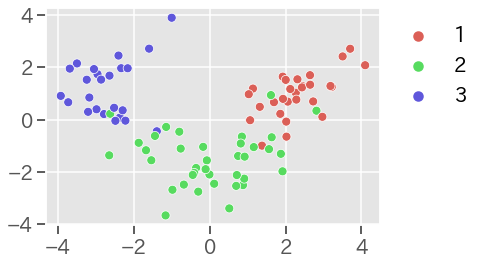

In [ ]:
ax = sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = y_train, palette = sns.hls_palette(3), legend = 'full')
# scatterplotが作った凡例の材料を取得
handles, labels = ax.get_legend_handles_labels()
# 上書きする際に位置を指定
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

### 箱ひげ図（クラスごとにも）

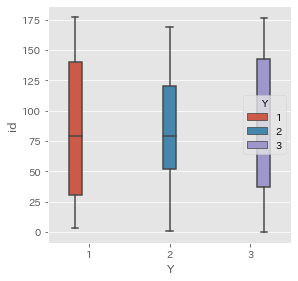

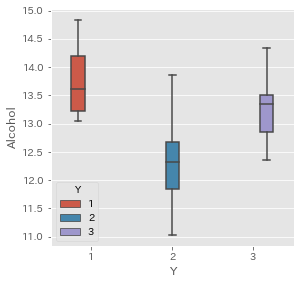

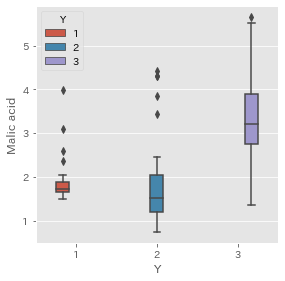

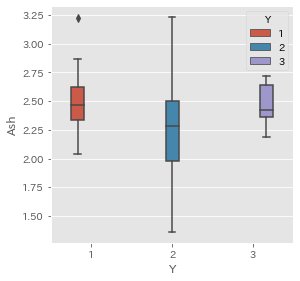

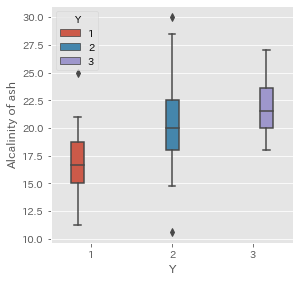

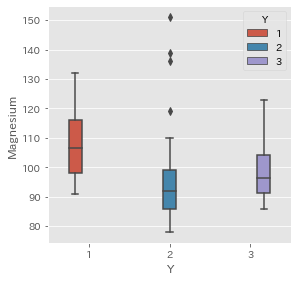

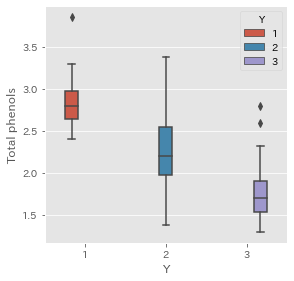

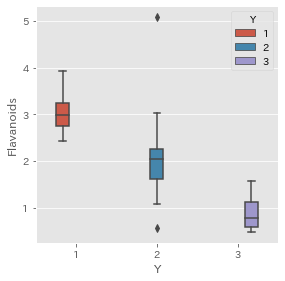

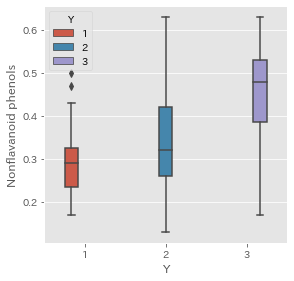

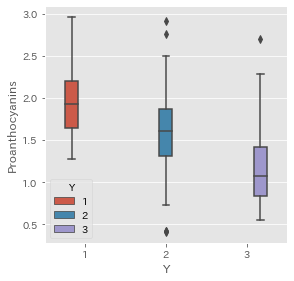

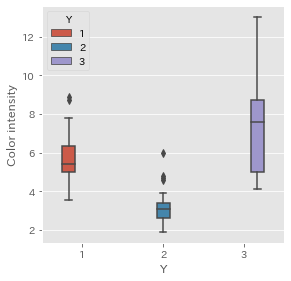

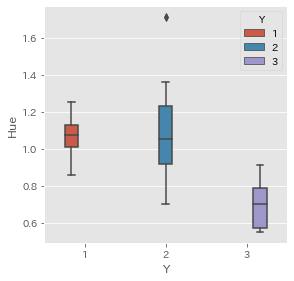

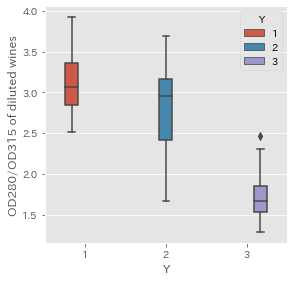

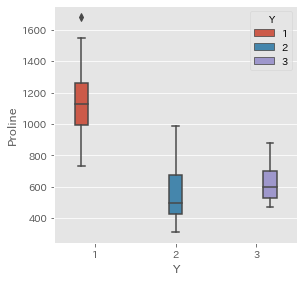

In [5]:
for id,col in enumerate(df.drop('Y',axis=1).columns):
    fig = plt.figure(figsize=(20,20))
    fig.add_subplot(4, 4, id+1)
    sns.boxplot(x='Y', y=col,data=df,width=0.5,hue="Y")
plt.show()
# Total phenols　うまく別れてる
# Flavanoids　